# Projet: Optimisation de Porteuifeuille boursier

Un portefeuille boursier, aussi connu sous le nom de portefeuille d'investissement, est une collection d'actifs financiers possédés par un investisseur. Ces actifs peuvent inclure des actions, des obligations, des fonds communs de placement, des produits dérivés et d'autres instruments financiers. L'objectif de composer un portefeuille est de diversifier les investissements pour gérer les risques tout en maximisant les rendements.

En diversifiant, on réduit le risque global puisque la performance d'un seul investissement n'a pas un impact disproportionnellement élevé sur l'ensemble du portefeuille. Par exemple, si une action sous-performe, son impact négatif peut être compensé par la surperformance d'autres actions ou d'autres types d'actifs dans le portefeuille.

## Contexte

L'optimisation de portefeuille est une méthode utilisée par les investisseurs pour maximiser les rendements tout en minimisant les risques. En prenant en compte divers paramètres économiques et financiers, il est possible de construire un portefeuille qui répond aux objectifs spécifiques de l'investisseur.

## Objectif:

Ce projet vise à optimiser un portefeuille composé de cinq grandes entreprises : Apple (AAPL), Microsoft (MSFT), Amazon (AMZN), Alphabet (GOOGL), et Johnson & Johnson (JNJ).

Pour commencer notre Projet, nous avons d'abord installer yfinance qui est une bibliothèque Python populaire utilisée pour extraire des données financières à partir de Yahoo Finance. Elle permet d'accéder facilement aux prix historiques des actions, des indices, des devises, et d'autres instruments financiers, ainsi qu'aux données actuelles de marché. Voici un aperçu de ses principales fonctionnalités :

#### Installation de yfinance

In [1]:
!pip install yfinance

#### Importation des bibliothèques nécéssaires

In [2]:
import yfinance as yf
from datetime import date, timedelta
import pandas as pd

#### collectes des données de 5 entreprises sur yahoo finance du 11-11-2023 au 11-11-2024

In [3]:
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today()-timedelta(days = 365)).strftime("%Y-%m-%d")
list_company = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'JNJ']
data = yf.download(list_company, start = start_date, end = end_date)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


#### Transformation et Reformatage des Données télécharger

In [4]:
# Fusionner les niveaux de MultiIndex en une seule chaîne pour chaque colonne
data = data.reset_index()
data.columns = ['_'.join(col).strip() for col in data.columns.values]

# Vérifier la nouvelle structure des colonnes
print(data.columns)


Index(['Date_', 'Close_AAPL', 'Close_AMZN', 'Close_GOOGL', 'Close_JNJ',
       'Close_MSFT', 'High_AAPL', 'High_AMZN', 'High_GOOGL', 'High_JNJ',
       'High_MSFT', 'Low_AAPL', 'Low_AMZN', 'Low_GOOGL', 'Low_JNJ', 'Low_MSFT',
       'Open_AAPL', 'Open_AMZN', 'Open_GOOGL', 'Open_JNJ', 'Open_MSFT',
       'Volume_AAPL', 'Volume_AMZN', 'Volume_GOOGL', 'Volume_JNJ',
       'Volume_MSFT'],
      dtype='object')


In [5]:
# Appliquer melt en utilisant 'Date' comme id_var
data_melted = data.melt(id_vars=['Date_'], var_name='Attribute_Ticker', value_name='Value')

# Vérifier le résultat
data_melted.head()


,Date_,Attribute_Ticker,Value
0,2024-05-21,Close_AAPL,191.454636
1,2024-05-22,Close_AAPL,190.011368
2,2024-05-23,Close_AAPL,186.010101
3,2024-05-24,Close_AAPL,189.095657
4,2024-05-28,Close_AAPL,189.105606


In [6]:
# Séparer 'Attribute_Ticker' en deux colonnes
data_melted[['Attribute', 'Ticker']] = data_melted['Attribute_Ticker'].str.split('_', expand=True)

# Supprimer la colonne combinée
data_melted = data_melted.drop(columns=['Attribute_Ticker'])

# Vérifier le résultat final
data_melted.head()


,Date_,Value,Attribute,Ticker
0,2024-05-21,191.454636,Close,AAPL
1,2024-05-22,190.011368,Close,AAPL
2,2024-05-23,186.010101,Close,AAPL
3,2024-05-24,189.095657,Close,AAPL
4,2024-05-28,189.105606,Close,AAPL


In [7]:
data_pivoted = data_melted.pivot_table(index=['Date_', 'Ticker'], columns='Attribute', values='Value', aggfunc='first')
stock_data = data_pivoted.reset_index()
stock_data.head()

Attribute,Date_,Ticker,Close,High,Low,Open,Volume
0,2024-05-21,AAPL,191.454636,191.832856,190.031284,190.200491,42309400.0
1,2024-05-21,AMZN,183.149994,183.259995,180.750000,182.300003,50839100.0
2,2024-05-21,GOOGL,177.003769,177.302329,174.973467,176.058277,16989400.0
3,2024-05-21,JNJ,147.723465,149.042067,147.283916,148.250903,5492400.0
4,2024-05-21,MSFT,425.775604,429.675695,421.617482,423.582398,21453300.0


##### Examinons maintenant les performances boursières de ces entreprises au fil du temps :

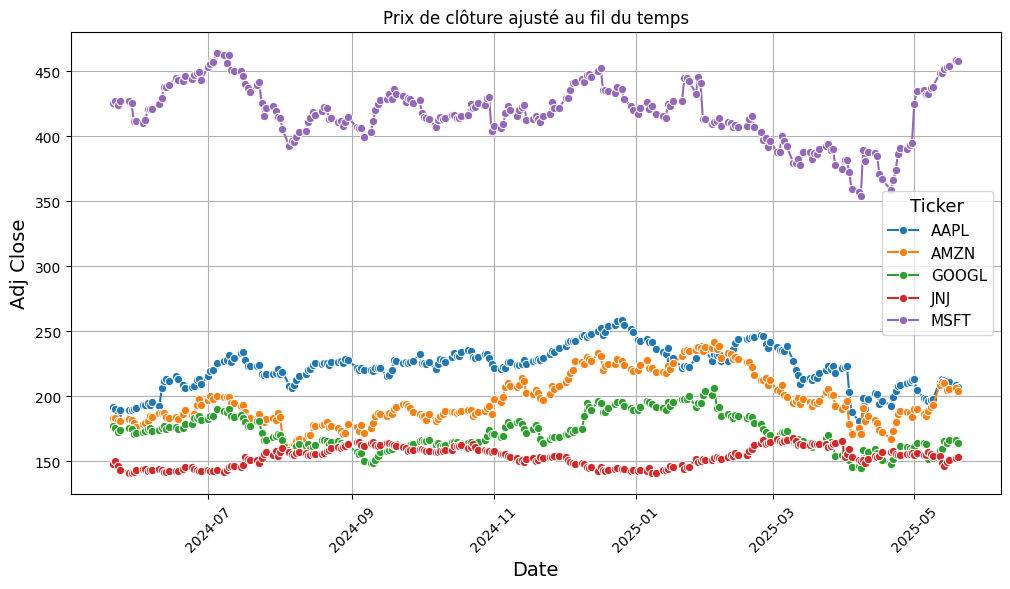

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
stock_data['Date_'] = pd.to_datetime(stock_data['Date_'])
stock_data.set_index('Date_', inplace = True)
stock_data.reset_index(inplace = True)
plt.figure(figsize = (12, 6))
sns.lineplot(stock_data, x = 'Date_', y = 'Close', hue = 'Ticker', marker = 'o')
plt.title('Prix de clôture ajusté au fil du temps')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Adj Close', fontsize = 14)
plt.legend(title = 'Ticker', title_fontsize = '13', fontsize = '11')
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()


Le graphique montre les prix de clôture ajustés de cinq actions (Apple, Amazon, Google, Johnson & Johnson, Microsoft) de novembre 2023 à novembre 2024. Microsoft affiche les prix les plus élevés et une forte tendance haussière, indiquant une excellente performance. Apple présente également une augmentation notable, bien que plus modérée. Amazon et Google montrent des croissances stables avec des fluctuations périodiques, tandis que Johnson & Johnson affiche des prix relativement stables, typiques d'une action défensive.

#### Calculons maintenant les moyennes mobiles à 50 et 200 jours et représentons-les avec le prix de clôture ajusté pour chaque action :

#### Utilité des moyennes mobiles

Tendances à Moyen Terme (50 jours) : La moyenne mobile à 50 jours permet de détecter les tendances des cours à moyen terme. Elle peut indiquer des changements de tendance plus rapidement que les moyennes de plus longue période.

Tendances à Long Terme (200 jours) : La moyenne mobile à 200 jours est un indicateur classique utilisé pour identifier les tendances à long terme.

Croisements de Moyennes Mobiles : Lorsque la moyenne mobile à 50 jours croise celle à 200 jours à la hausse (crossover haussier), cela peut être interprété comme un signal d'achat potentiel. Inversement, un croisement à la baisse (crossover baissier) peut indiquer un signal de vente potentiel.

Lissage des Données : Les moyennes mobiles lissent les fluctuations quotidiennes des prix, rendant les tendances plus perceptibles.

In [12]:
short_window = 50
long_window = 200

stock_data.set_index('Date_', inplace=True)
unique_tickers = stock_data['Ticker'].unique()

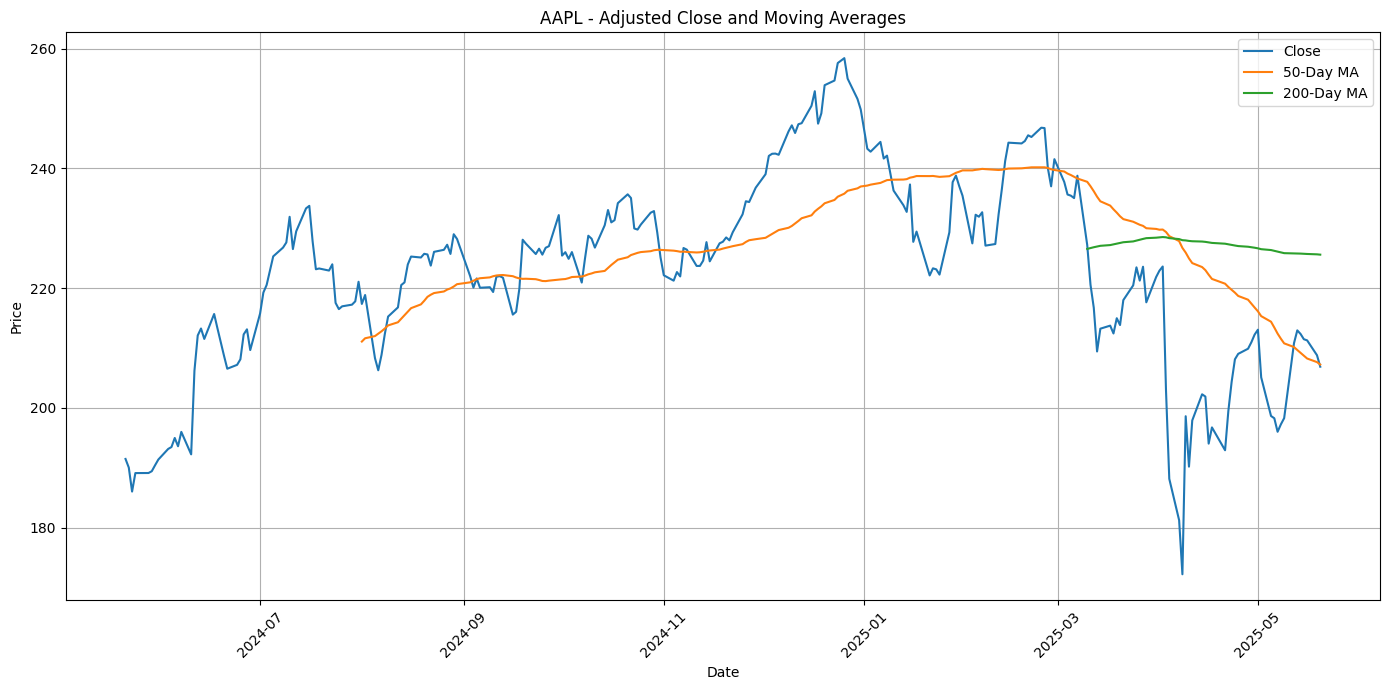

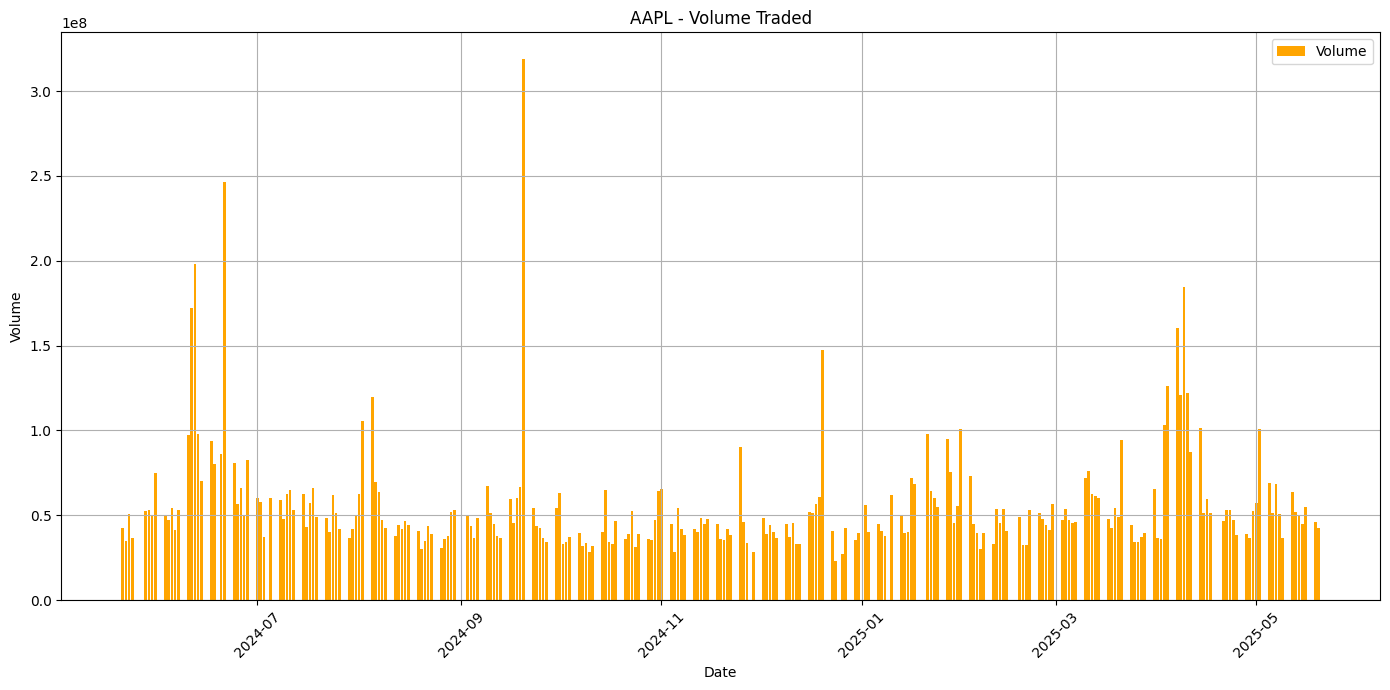

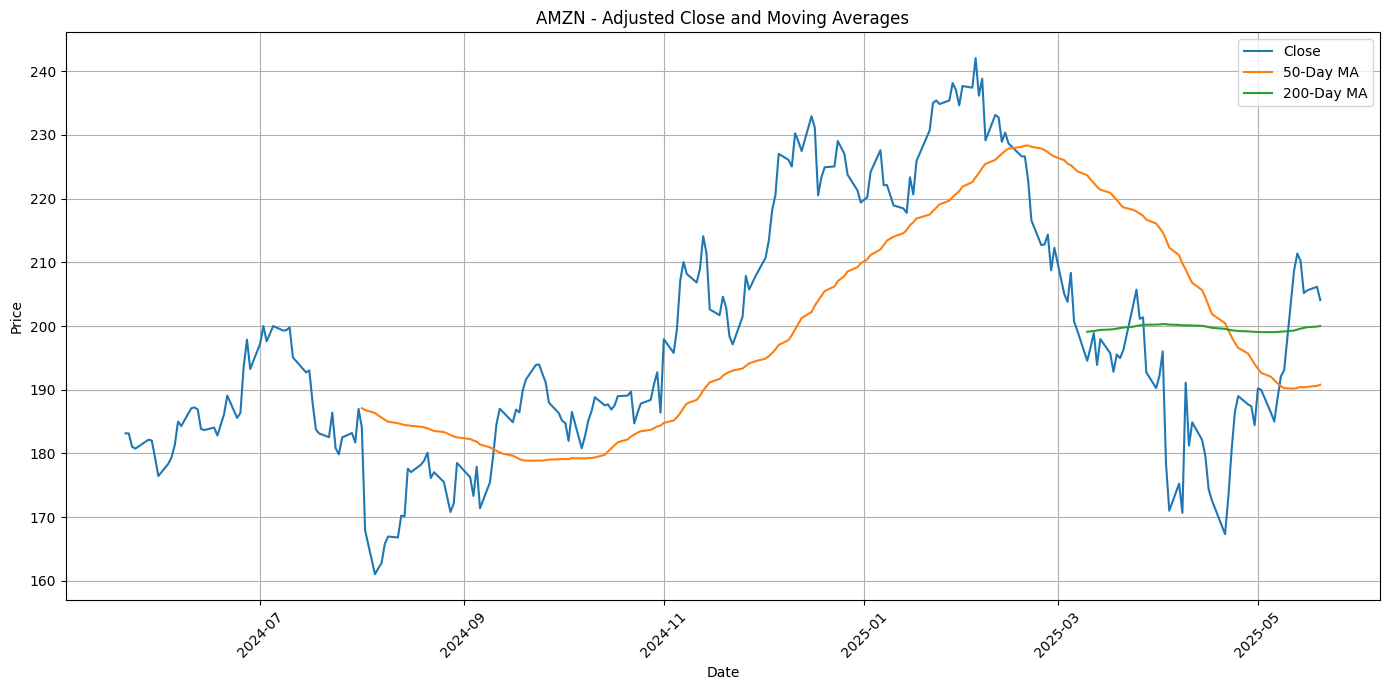

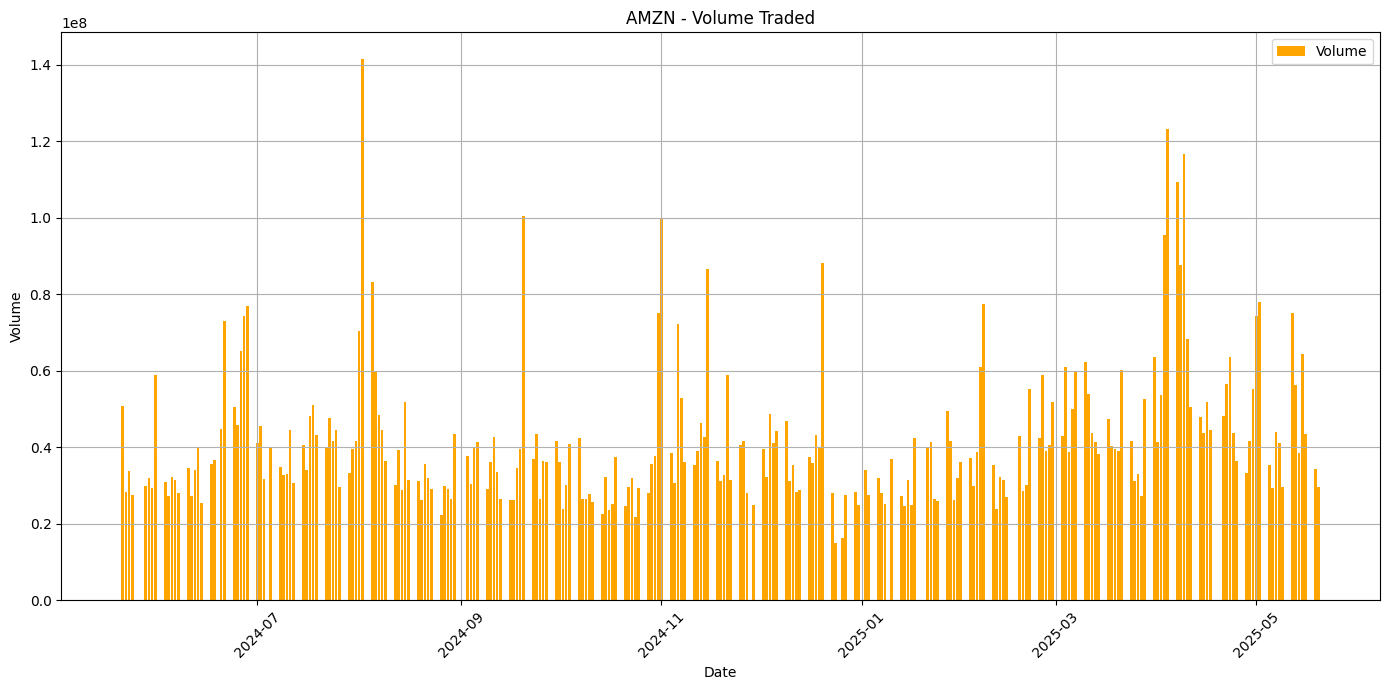

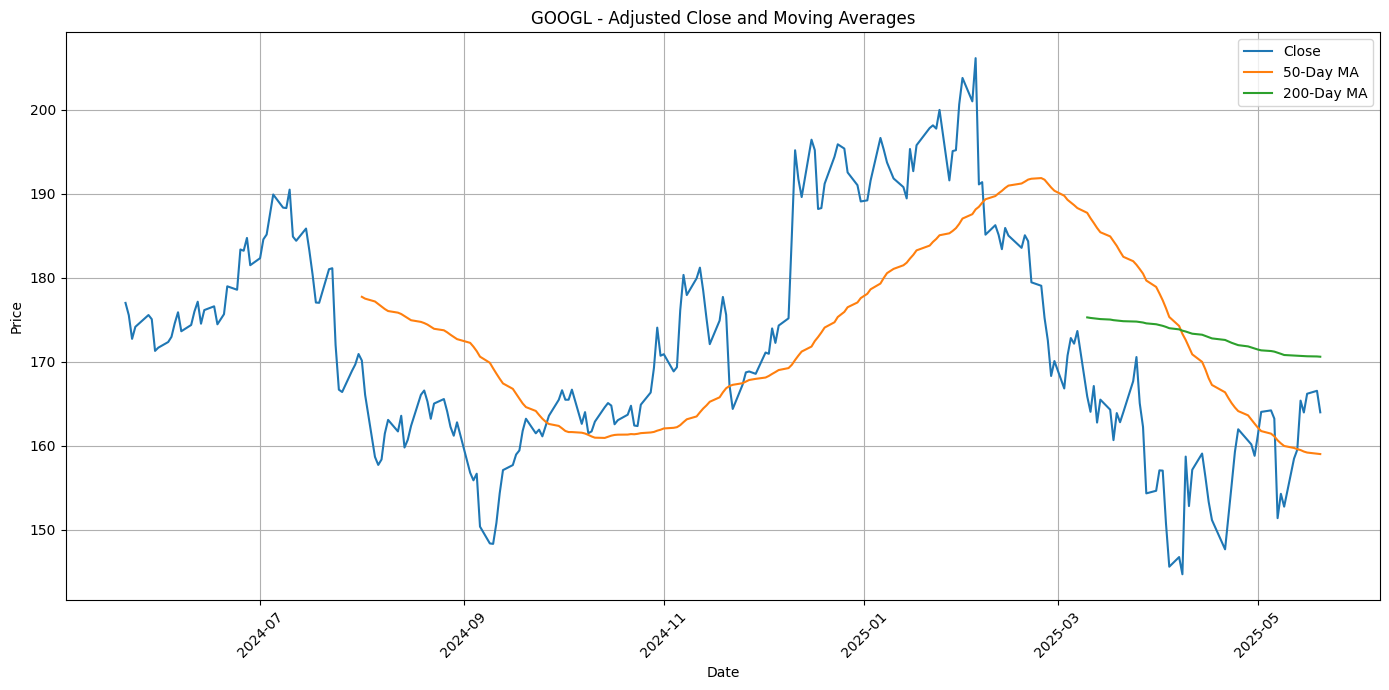

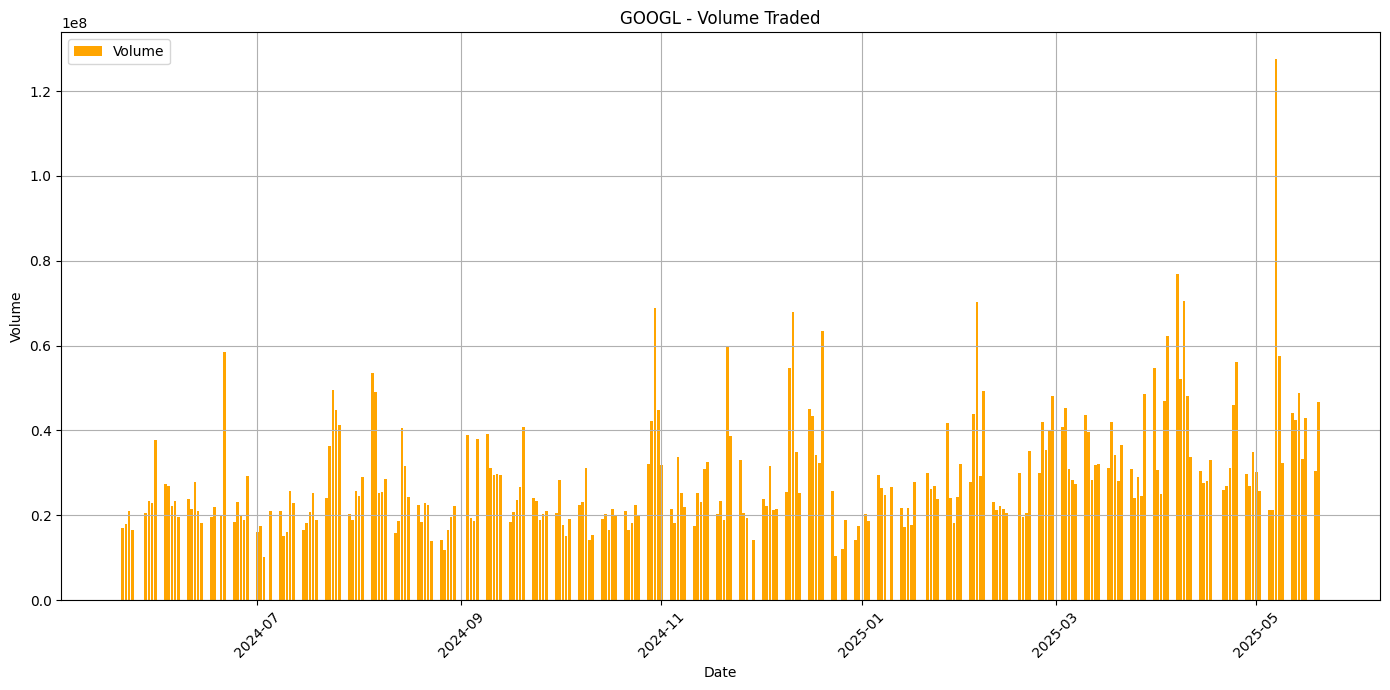

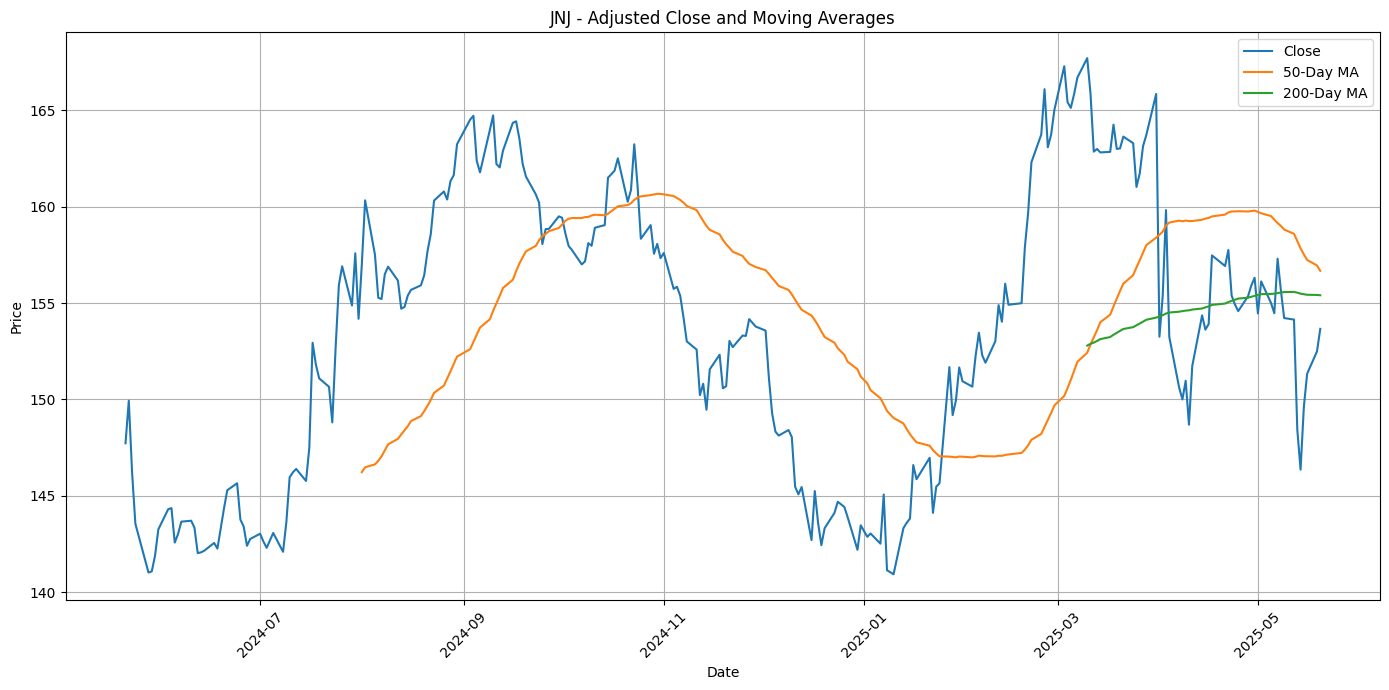

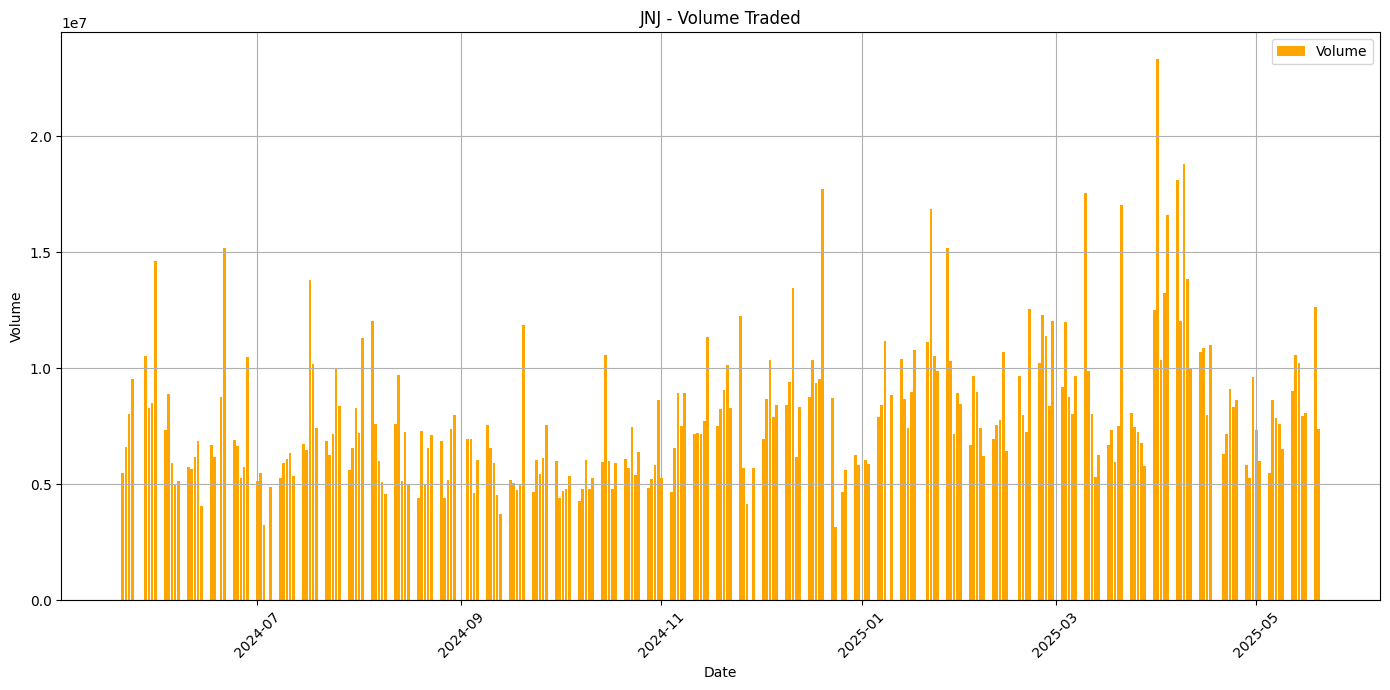

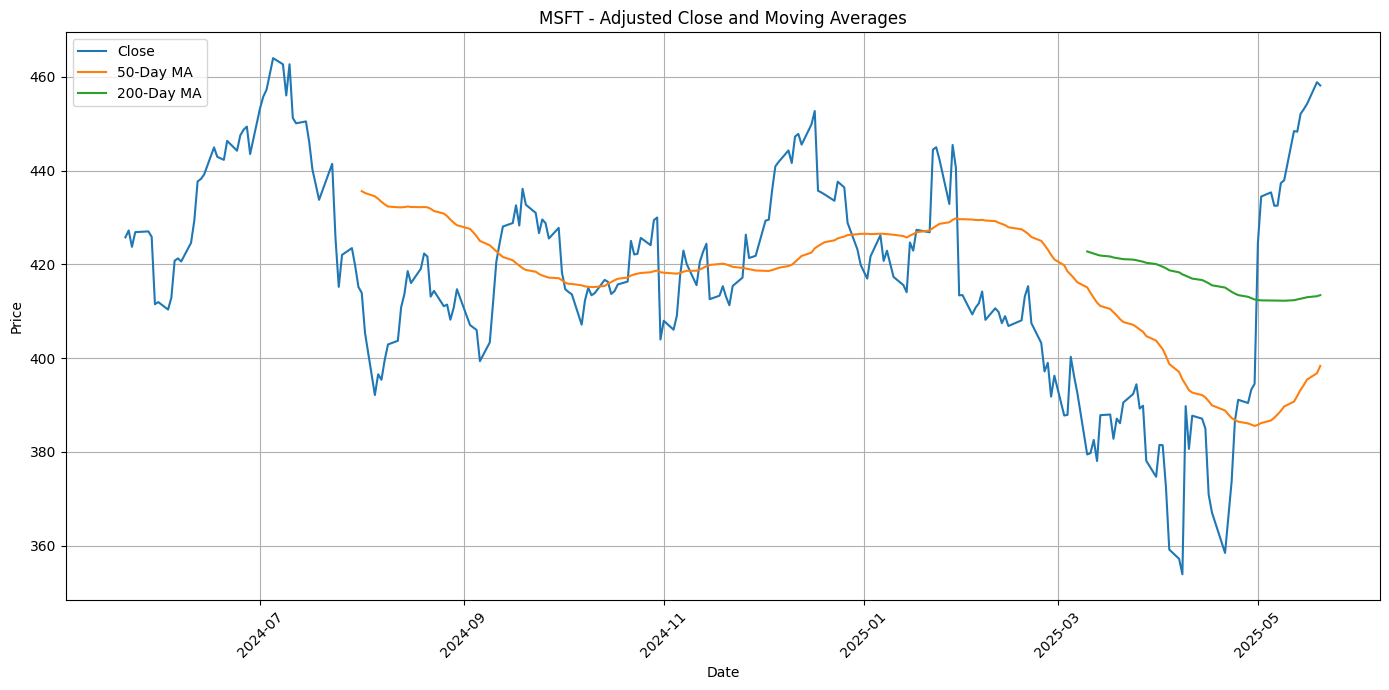

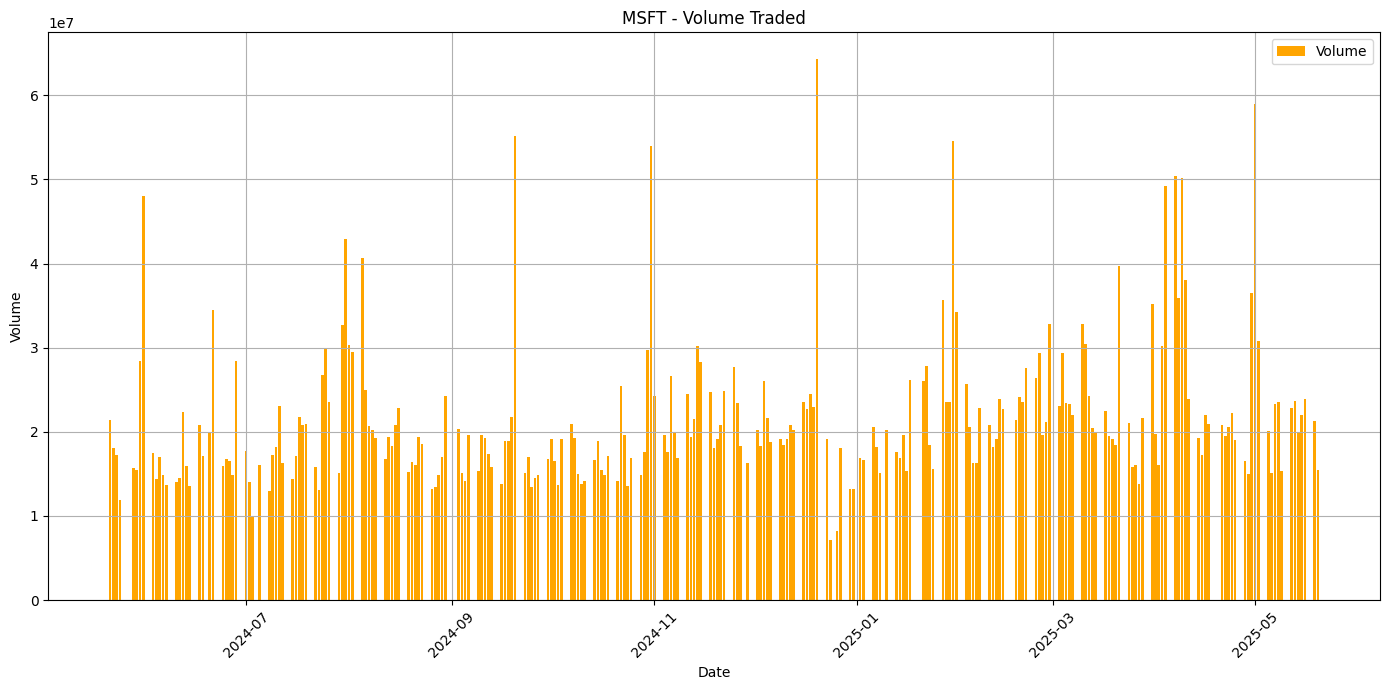

In [13]:
for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()
    ticker_data['50_MA'] = ticker_data['Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Close'].rolling(window=long_window).mean()

    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Close'], label='Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Pour AAPL On constate une augmentation croissante des prix du comme l'indiquent les moyennes mobiles. AMZN et GOOGL affichent également des tendances haussières mais avec beaucoup de variation(tantôt les prix diminuent, tantôt elles augmentent). Les prix de JNJ et MSFT monrent également beaucoup de fluctuation mais on constate beaucoup plus une baisse chez JNJ et une constance chez MSFT.Les graphiques du volume échangé mettent en évidence une activité de trading importante à différents moments, avec des pics indiquant des volumes de trading élevés, particulièrement notables chez APPL à partir du 05/2024. Ces informations sont cruciales pour comprendre les mouvements de prix et les comportements de trading, ce qui aide à prendre des décisions d'investissement éclairées.

Examinons maintenant la distribution des rendements quotidiens de ces actions :

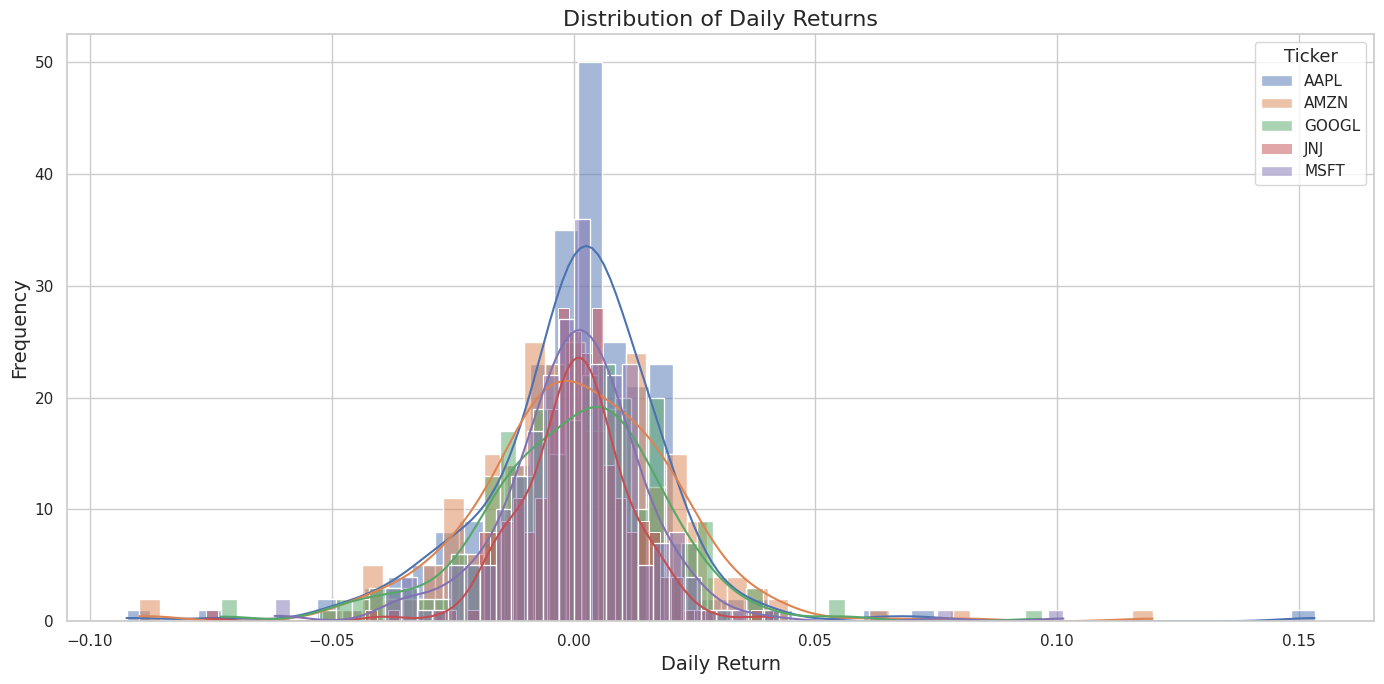

In [14]:
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Close'].pct_change()

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()

Les distributions sont approximativement normales, centrées autour de zéro, ce qui indique que la plupart des rendements journaliers sont proches du rendement moyen. Cependant, il existe des queues des deux côtés, qui reflètent des gains ou des pertes importants occasionnels. GOOGL semble avoir une distributions légèrement plus large, ce qui suggère une volatilité plus élevée par rapport aux autres.

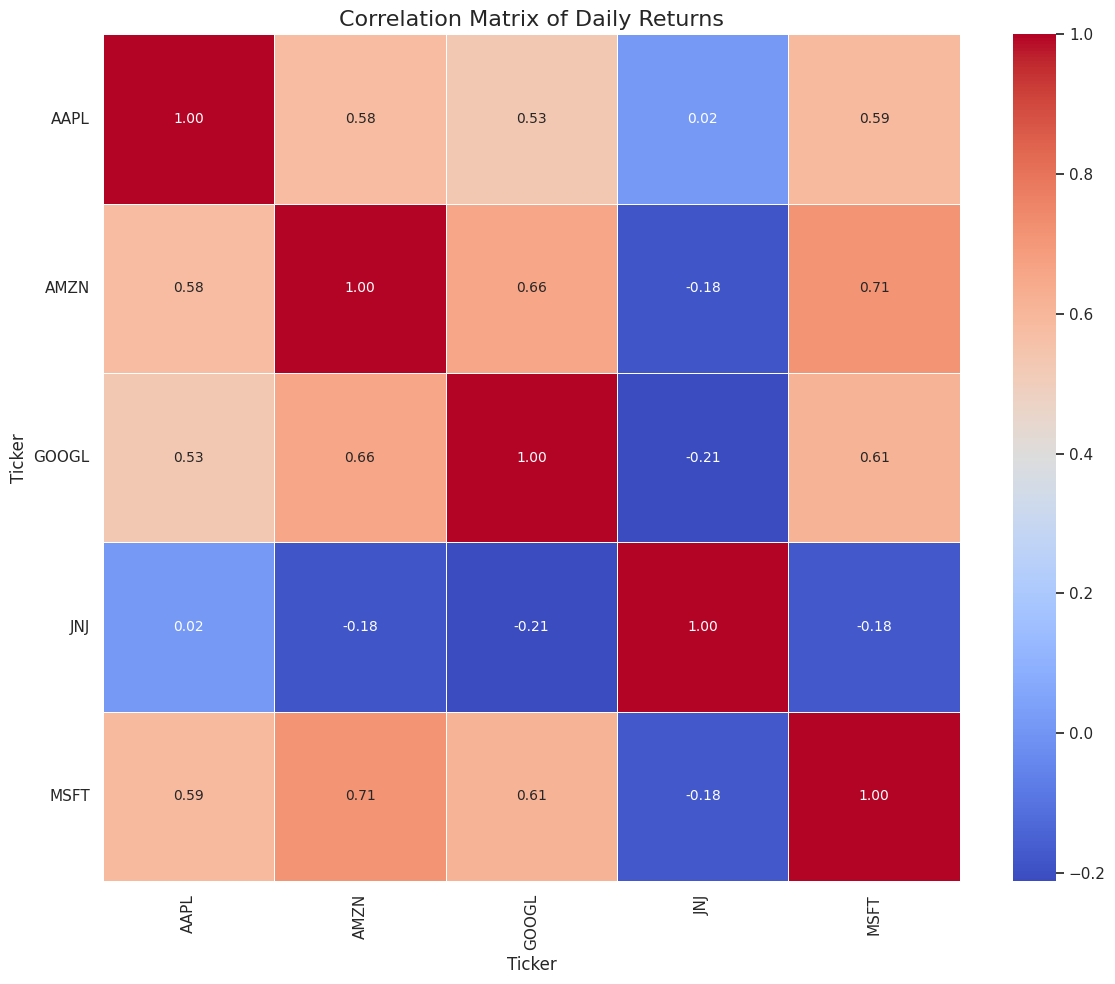

In [15]:
daily_returns = stock_data.pivot_table(index='Date_', columns='Ticker', values='Daily Return')
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

AMZN et MSFT présentent une forte corrélation positive (0,69), ce qui indique qu'ils ont tendance à évoluer dans la même direction. MSFT présente également une corrélation positive avec GOOGL(0,57) et AAPL(0,47). Ce qui est de même pour GOOGL et AMZN(0,54). GOOGL présente une corrélation positive modérée avec APPL(0,37) et une faible corrélation avec JNJ (-0,13). AMZN affiche une corrélation modéré avec APPL(0,33) et une faible corrélation avec JNJ(-0,15). INFY (0,19) et TCS (0,13). Ces corrélations variables suggèrent des avantages potentiels de diversification ; la combinaison d'actions avec des corrélations plus faibles peut réduire le risque global du portefeuille.

### Portfolio Optimization

Maintenant, en utilisant la théorie moderne du portefeuille, nous pouvons construire un portefeuille efficace en équilibrant risque et rendement.
Nous allons :

Calculer les rendements attendus et la volatilité pour chaque action.

Générer une série de portefeuilles aléatoires pour identifier la frontière efficace.

Optimiser le portefeuille pour maximiser le ratio de Sharpe, qui est une mesure du rendement ajusté au risque.

Calculons les rendements attendus et la volatilité pour chaque action:

In [16]:
import numpy as np

expected_returns = daily_returns.mean() * 252  # annualize the returns
volatility = daily_returns.std() * np.sqrt(252)  # annualize the volatility

stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

stock_stats

,Expected Return,Volatility
Ticker,,
AAPL,0.132034,0.330302
AMZN,0.169241,0.346810
GOOGL,-0.028293,0.313491
JNJ,0.058427,0.192210
MSFT,0.107000,0.257498


AMZN a le rendement attendu le plus élevé (40,28 %) et une volatilité modérée (28,14 %), ce qui indique un investissement potentiellement très rémunérateur avec un risque relativement élevé. GOOGL et AAPL ont également des rendements attendus élevés (respectivement 34,66 % et 28,91 %) avec une volatilité modérée (28,22 % et 22,67 %). MSFT et JNJ ont les rendements attendu les plus faible (9,97% et -8,07%) et une volatilité modérée (20,02% et 15,36%), ce qui le rend le moins attrayant en termes de rendement ajusté au risque.

Ensuite, nous allons :

#### -Générer un grand nombre de pondérations aléatoires de portefeuille.

#### -Calculer le rendement attendu et la volatilité pour chaque portefeuille.

#### -Tracer ces portefeuilles pour visualiser la frontière efficace.

#### -Générons les portefeuilles aléatoires et traçons la frontière efficace:

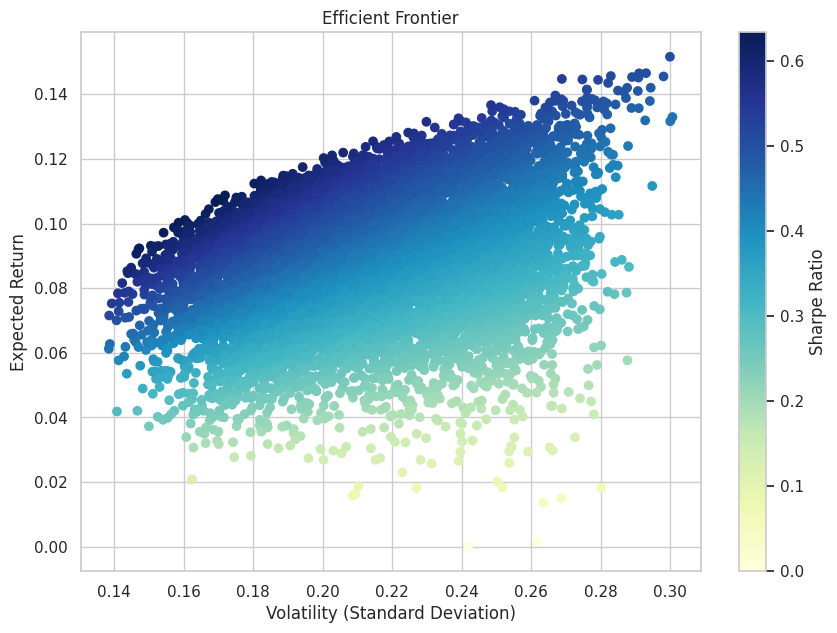

In [17]:
# function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# number of portfolios to simulate
num_portfolios = 10000

# arrays to store the results
results = np.zeros((3, num_portfolios))

# annualized covariance matrix
cov_matrix = daily_returns.cov() * 252

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return / portfolio_volatility  # Sharpe Ratio

plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

Chaque point sur ce graphique représente un portefeuille d'investissement différent. La position horizontale d'un point indique la volatilité du portefeuille, qui est une mesure de son risque. Plus un point est à droite, plus le portefeuille est risqué. La position verticale d'un point indique le rendement attendu du portefeuille. Plus un point est haut, plus le rendement attendu est élevé.

La couleur de chaque point représente le ratio de Sharpe, qui mesure le rendement ajusté au risque d'un portefeuille. Plus le ratio de Sharpe est élevé, meilleur est le compromis entre le rendement et le risque. Les portefeuilles avec les ratios de Sharpe les plus élevés sont représentés par les points de couleur bleue foncé.

La courbe qui relie les portefeuilles avec les meilleurs ratios de Sharpe pour chaque niveau de risque est appelée la frontière efficace. Les portefeuilles situés sur cette frontière sont considérés comme optimaux, car ils offrent le rendement attendu le plus élevé pour un niveau de risque donné. En d'autres termes, il n'est pas possible de trouver un portefeuille en dehors de cette frontière qui offre un meilleur rendement pour un risque équivalent.

#### Voici comment identifier le portefeuille avec le ratio de Sharpe maximal:

In [18]:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(np.float64(0.10757432262635347),
 np.float64(0.16980931474263733),
 np.float64(0.6335007169035038))

Le portefeuille avec le ratio de Sharpe maximal présente les caractéristiques suivantes :

#### -Rendement attendu : ~32,53 %
#### -Volatilité : ~19,87 %
#### -Ratio de Sharpe : ~1,63

##### Ensuite, identifions les pondérations des actions dans le portefeuille qui donnent le ratio de Sharpe maximal.

In [19]:
max_sharpe_weights = np.zeros(len(unique_tickers))

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': max_sharpe_weights
})

portfolio_weights_df

,Ticker,Weight
0,AAPL,0.201935
1,AMZN,0.043948
2,GOOGL,0.178036
3,JNJ,0.516455
4,MSFT,0.059627


La sortie montre un portefeuille diversifié avec les allocations suivantes :

##### AAPL (16,56 %)
##### AMZN (23,35 %)
##### GOOGL (23,56 %)
##### JNJ (13,43 %)
##### MSFT (23,09 %)

AMZN, GOOGL, MSFT ont les allocations les plus élevées, ce qui indiquent leurs contributions significatives à la performance du portefeuille, tandis qu'JNJ a l'allocation la plus faible. Cette allocation équilibrée vise à maximiser les rendements tout en minimisant le risque en tirant parti des performances individuelles des actions et de leurs corrélations.


[*********************100%***********************]  5 of 5 completed



📊 PLAN D'INVESTISSEMENT POUR 10 000 € (AVEC PRIX ACTUELS)
+----+----------+----------+-------------------+---------------+--------------+---------------------------+-------------+
|    | Ticker   |   Weight |   Prix Actuel (€) |   Montant (€) |   Nb Actions |   Investissement Réel (€) |   Ecart (€) |
+====+==========+==========+===================+===============+==============+===========================+=============+
|  3 | JNJ      |     0.52 |            153.18 |       5164.55 |        33.00 |                   5054.94 |      109.61 |
+----+----------+----------+-------------------+---------------+--------------+---------------------------+-------------+
|  0 | AAPL     |     0.20 |            202.09 |       2019.35 |         9.00 |                   1818.81 |      200.54 |
+----+----------+----------+-------------------+---------------+--------------+---------------------------+-------------+
|  2 | GOOGL    |     0.18 |            168.56 |       1780.36 |        10.00 |        

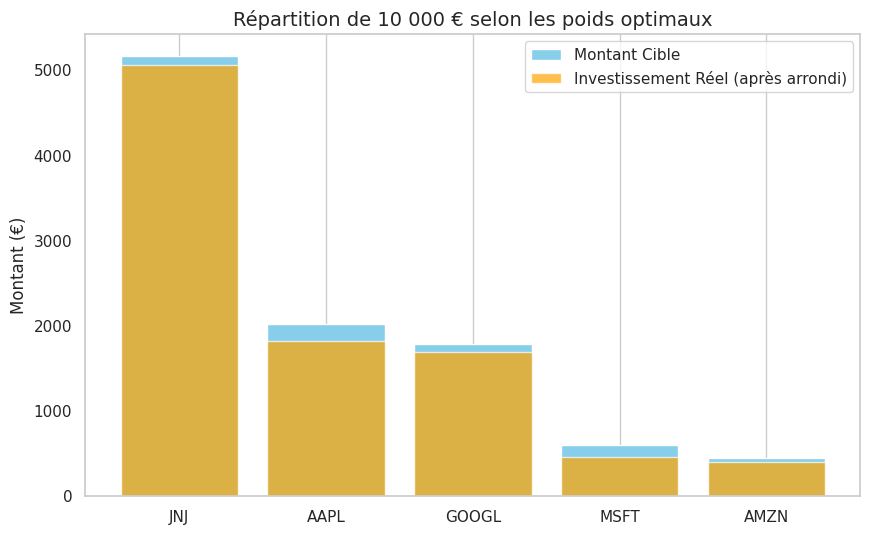

In [21]:
# -------------------------------------------------------------------
# 6. APPLICATION PRATIQUE : RÉPARTITION DE 10 000 €
# -------------------------------------------------------------------
def calculate_investment(portfolio_weights, capital=10000):
    """
    Calcule le montant à investir dans chaque action pour un capital donné.
    Args:
        portfolio_weights (DataFrame): DataFrame des poids optimaux (ex: output de portfolio_weights_df)
        capital (float): Montant total à investir (par défaut 10 000 €)
    Returns:
        DataFrame: Montants et nombre d'actions à acheter (avec ajustements pratiques)
    """
    import yfinance as yf

    # Récupère les prix actuels des actions
    current_prices = yf.download(portfolio_weights['Ticker'].tolist(), period='1d')['Close'].iloc[-1]

    # Calcule les montants et nombre d'actions
    investment = portfolio_weights.copy()
    investment['Prix Actuel (€)'] = investment['Ticker'].map(current_prices)
    investment['Montant (€)'] = investment['Weight'] * capital
    investment['Nb Actions'] = investment['Montant (€)'] // investment['Prix Actuel (€)']
    investment['Investissement Réel (€)'] = investment['Nb Actions'] * investment['Prix Actuel (€)']
    investment['Ecart (€)'] = investment['Montant (€)'] - investment['Investissement Réel (€)']

    return investment.sort_values(by='Weight', ascending=False)

# Exécute la fonction avec les poids optimaux
investment_plan = calculate_investment(portfolio_weights_df)
print("\n" + "="*80)
print("📊 PLAN D'INVESTISSEMENT POUR 10 000 € (AVEC PRIX ACTUELS)")
print("="*80)
print(investment_plan.to_markdown(tablefmt="grid", floatfmt=".2f"))

# Visualisation graphique
plt.figure(figsize=(10, 6))
plt.bar(investment_plan['Ticker'], investment_plan['Montant (€)'], color='skyblue', label='Montant Cible')
plt.bar(investment_plan['Ticker'], investment_plan['Investissement Réel (€)'], color='orange',
        alpha=0.7, label='Investissement Réel (après arrondi)')
plt.title('Répartition de 10 000 € selon les poids optimaux', fontsize=14)
plt.ylabel('Montant (€)')
plt.legend()
plt.grid(axis='y')
plt.show()